In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df['species']=df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],
                                                    test_size=0.30, random_state=42,
                                                    stratify=df.iloc[:,-1])

In [4]:
display(X_train.describe())
display(X_test.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.873333,3.055238,3.784762,1.205714
std,0.862941,0.457203,1.784052,0.777549
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.900000
max,7.900000,4.400000,6.900000,2.500000


,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000
mean,5.773333,3.062222,3.695556,1.184444
std,0.744800,0.386293,1.738986,0.733595
min,4.400000,2.300000,1.000000,0.200000
25%,5.000000,2.900000,1.600000,0.300000
50%,5.800000,3.000000,4.500000,1.400000
75%,6.400000,3.300000,5.100000,1.800000
max,7.300000,4.000000,6.300000,2.400000


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [6]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



[Text(0.3333333333333333, 0.9285714285714286, 'x[3] <= 0.7\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.2222222222222222, 0.7857142857142857, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.4444444444444444, 0.7857142857142857, 'x[3] <= 1.55\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.2222222222222222, 0.6428571428571429, 'x[2] <= 4.95\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.1111111111111111, 0.5, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.3333333333333333, 0.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6428571428571429, 'x[0] <= 6.1\nentropy = 0.31\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.5555555555555556, 0.5, 'x[0] <= 5.85\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.4444444444444444, 0.35714285714285715, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.6666666666666666, 0.35714285714285715, 'x[1] <= 2.85\nentropy = 0.918\nsamples = 

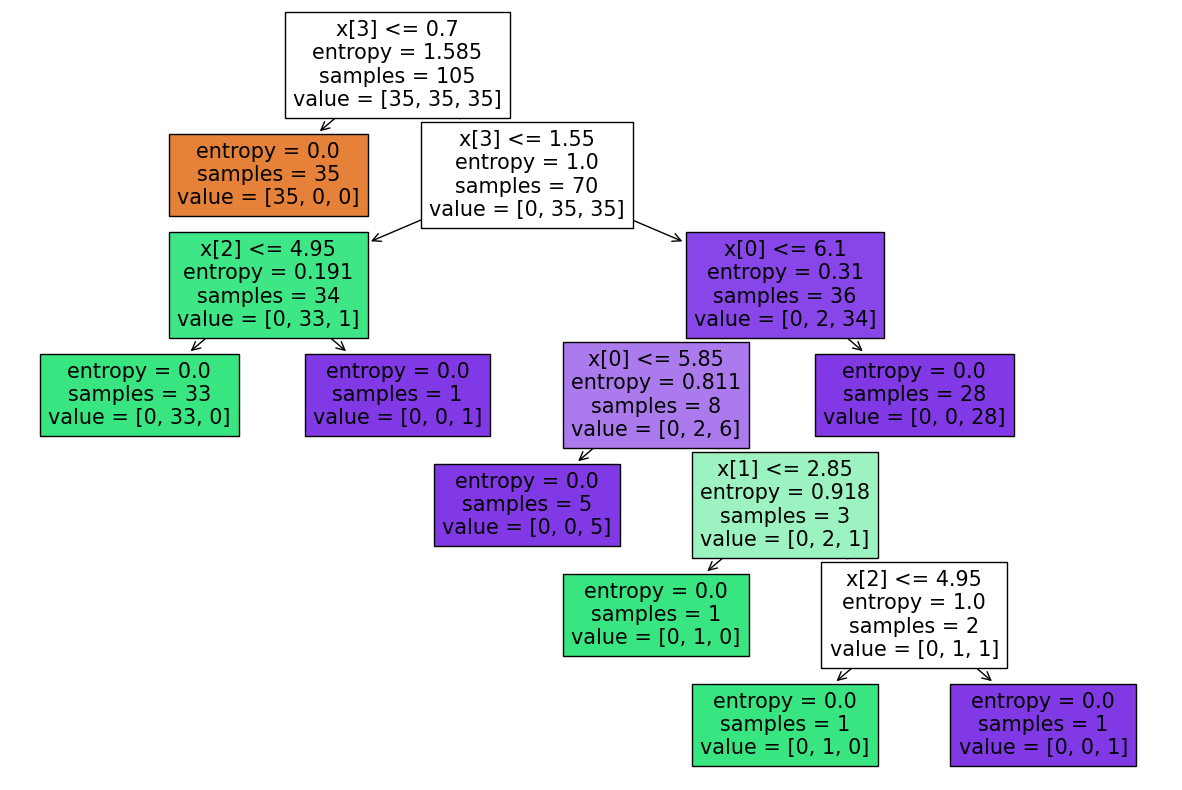

In [7]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)

In [8]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
pca = decomposition.PCA()
dtree=DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                       ('pca', pca),
                       ('dtree', dtree)])

n_components = list(range(1,X_train.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

parameters = dict(pca__n_components=n_components,
                  dtree__criterion=criterion,
                  dtree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['dtree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dtree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dtree'])

Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 3

DecisionTreeClassifier(criterion='entropy', max_depth=4)


[[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.87      0.87      0.87        15
           2       0.87      0.87      0.87        15

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45



[Text(0.375, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.25, 0.7, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.55\nentropy = 1.0\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5, 'x[2] <= 4.95\nentropy = 0.191\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.125, 0.3, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0]'),
 Text(0.375, 0.3, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.5, 'x[0] <= 6.1\nentropy = 0.31\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.625, 0.3, 'x[0] <= 5.85\nentropy = 0.811\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.875, 0.3, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

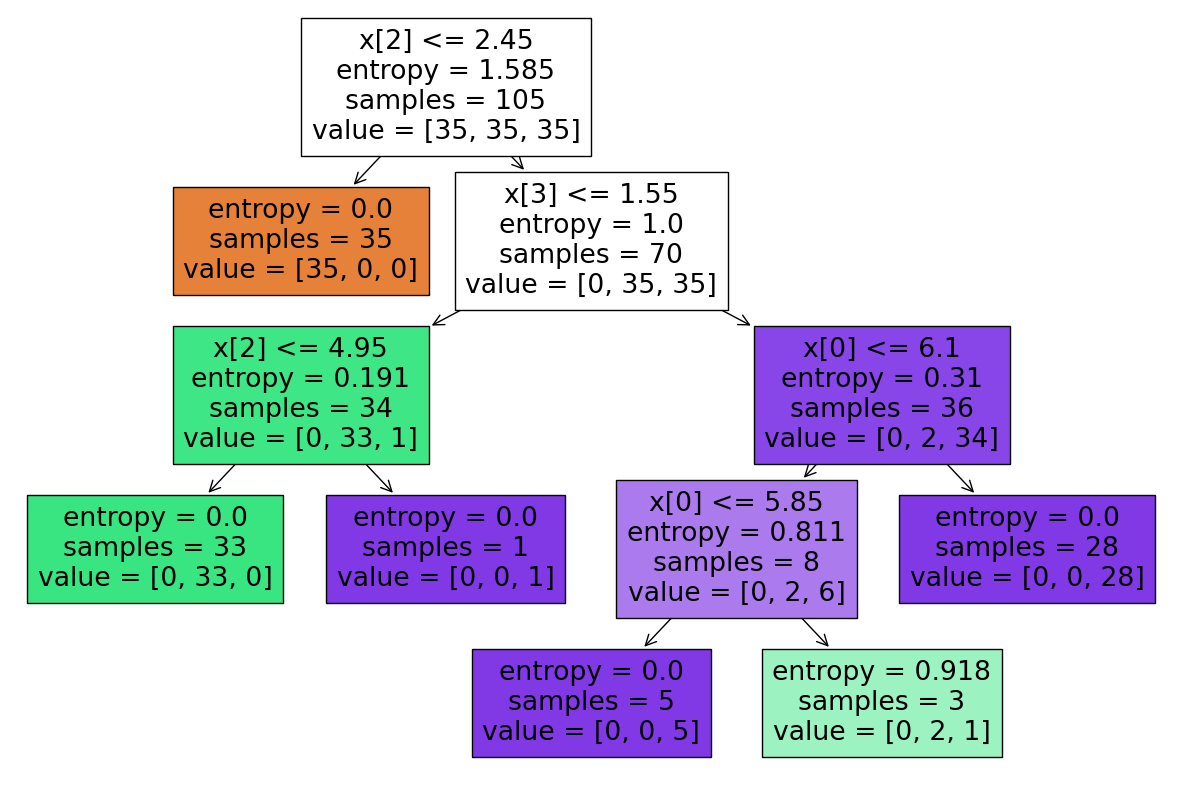

In [9]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)